<h1 align=center><font size = 8>Domestic violence on Woman</font></h1>

<div class="right"> 
<center>
<img src="./arm_haitien.jpg"  alt="drawing" width="110"/> 
</center>
</div>

# Objective

* propose an outline of the future to young women victim of violence



# Hypothesis or research question

**What are the key factors that explain domestic violence? What is the future for women victims?  **   

# Project plan
* [Context](#context)
* [Introduction](#introduction)
* [Data source](#source)
* [Exploratory data analysis](#Exploratory)
* [Haitian Beating](#sociodemographyque)
* [Reflections](#Reflections)

# Context <a name="Context"></a>

" _As a first time witness to domestic violence, my cousin suffered greatly in her relationship with her partner. It was not at all easy for her to live every day with so much pain, fear and worry. All this violence was a major obstacle to her development and well-being. All of this prevented her from living safely and caused physical and psychological injuries that undermined her ability to lead a normal life, to access the education she needed, to earn a living, to build her future and to participate in public life.

Why did your partner beat you?
What did you do next?

To study the factors that are related to domestic violence, the profiles of the victims in order to find a way to sensitize the aggressors and eradicate or mitigate domestic violence. This is the purpose of my project. 


# Data source <a name="Data source"></a>

The data were collected on EMMUS-VI (Mortality, Morbidity and Service Utilization Survey in Haiti 2026-2017....
It contains information on domestic violence that we have cleaned and saved in a csv file named: Violence_data.csv to better make the different analyses necessary for our study and that could better structure a profile of women victims of violence.

# Introduction <a name="Introduction"></a>

Women have an important role in the Haitian society. They represent 51% of the country's population.
In Haiti 273200 women are victims, each year, of serious physical or sexual violence, which corresponds to 9.4% of the population of women aged 14 to 49 years. This violence continues to affect a large number of Haitian women and constitutes a violation of human rights recognized by numerous universal and regional instruments.
''Tolerance and experience of domestic violence are important barriers to women's empowerment''

Domestic violence: among non-single women, 34% report having experienced various forms of violence at some point in their lives. 
declare that they have been subjected to various forms of emotional or sexual 
emotional or sexual violence by their husbands or partners. 
or partners. It should be noted that in 2005-2006, the rate of spousal violence 
emotional violence was 22%40,
**this phenomenon can be explained by:**

- Sexual apprenticeship:  This cause of violence is due to the way boys are educated to develop the notion of masculinity, they are oriented from early childhood to assertive and aggressive behaviors.

- Social learning:  It is assumed that men who are violent towards their partners copy or reproduce the violence observed in their own family. Men who witnessed violence between their parents are more likely to use violence against their partners.

- Society prepares men to occupy a dominant role:
They learn to exercise this privilege by force and, if necessary, by violence.

- The antecedents of domestic violence.
- Alcohol consumption among men and personality disorders.

Lack of obedience to men: 
- not having prepared the meal in time.
- not taking good care of the children or the home 
- going somewhere without his permission or refusing to sleep with him.

Domestic violence leads to serious problems such as divorce and separation, the victim or survivor may be homeless and have to flee their home with their children, it may also lead to loss of employment and income as the victim may lose her job due to frequent absenteeism, as a result of being beaten or injured, or because she is forced to leave her job as a safety precaution, or because she has moved to a safe place away from her job.

Pourqoui une femme victime de violence domestique ne peut-elle pas continnuer a vivre normalement sa vie?

# Exploratory data analysis <a name="Exploratory data analysis"></a>

## Haitian Beating <a name="Haitian Beating"></a>

## Read StataFile

In [724]:
# df_final.to_csv(r'C:\Users\peladia\Documents\Ayiti Analytics Casptone Project\Violence_data.csv', index = False, header=True)

In [725]:
class ReadStataFile:
    def __init__(self,folder_name):
        self.folder_name= folder_name
        self.__load_columns__()

    def __load_columns__(self):
      
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        labels = {}
        for line in lines[2:]:
            if line != "#delimit ;" and len(line.strip()) >0 :
                my_split = line.split('\"')
                my_var = my_split[0].replace("label variable","").strip()
                my_label = my_split[1].strip()
                labels[my_var]=my_label
            
            else:
                break;
        self.variables = labels.keys()
        self.labels = labels.values()
        self.col_dict =labels
        obj.close()
    
    def get_col_modality(self,variable_name):
        # #delimit cr
      
        folder_name = "HTBR71DT"
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        flag_delimiter = 0
        flag_variable_found = 0
        labels ={}
        for line in lines[2:]:
            #print(line)
            if line.lower().strip().find("delimit") >0:
                flag_delimiter = 1
                #print("delimiter found !!!")
            elif line.lower().find(variable_name.lower()) >0 and flag_delimiter == 1:
                flag_variable_found = 1
                #print("variable found !!!")
            elif flag_variable_found == 1 and flag_delimiter == 1 and  line.lower().find(variable_name.lower()) ==-1 and len(line.strip()) >0 and line.strip() != ";" and  len(line.split('\"')) >1   :
                my_split = line.split('\"')    
                my_var_string = my_split[0].strip()
                if self.is_number(my_var_string):
                    my_var = float(my_var_string)
                else:
                    my_var = my_var_string
                my_label = my_split[1].strip()
                labels[my_var]=my_label
                
            
            elif flag_variable_found == 1 and flag_delimiter == 1 and line.strip() == ";" :
                #print("variable not found !!!")
                break;
        obj.close()
        return labels 

    def get_col_label(self,variable_name):
        return self.col_dict.get(variable_name.lower())

    def to_dataframe(self,use_modality=False,columns=None):
        import pandas as pd
        file_name =self.folder_name[0:-2]+"FL"
        df = pd.read_stata(f"./{self.folder_name}/{file_name}.DTA",convert_categoricals=False)
        if len(columns)>0:
            df=df[columns]
        if  use_modality and len(columns)==0:
            for col in self.variables:
                my_dict = self.get_col_modality(col)
                df[col].replace(my_dict,inplace=True)
            
        elif use_modality and  len(columns)>0 :
            for col in columns:
                print (col)
                my_dict = self.get_col_modality(col)
                df[col] =df[col].replace(my_dict)
        df.rename(columns=self.col_dict,inplace=True)

      

        return df

    def is_number(self,string):
        try:
            float(string)
            return True
        except ValueError:
            return False
    def get_key(self,my_label):
        for key,label in self.col_dict.items():
            if label == my_label:
                return key
        return None

## Import Libraries needed.

In [688]:
# vector manipulation
import numpy as np
# for data analysis
import pandas as pd
# for dataviz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#Import stats Library for statistic test
from scipy.stats import chi2_contingency, f_oneway
#!pip install colorama
from colorama import Fore
import scipy.stats as stats
import statsmodels.api as sma
sns.set_style(style="ticks")


# machine learning
from sklearn.linear_model import LinearRegression,Ridge,RidgeClassifier,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import  KNeighborsClassifier
import re
from sklearn.svm import SVC

# for comparison
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,confusion_matrix,classification_report


In [689]:
rs = ReadStataFile("HTMR71DT")

In [690]:
cols=[
"mv104",
"mv013",
"mv106",   
"mv151",    
"mv152",    
"mv159",  
"mv034b_1",    
"mv151",    
"mv152",    
"mv159",    
"mv170",               
"mv463g",   
"mv463x",   
"mv463z",  
"mv463aa",  
"mv463ab",  
"mv463ac",  
"mv463ad",  
"mv464",    
"mv464a",   
"mv464b",   
"mv464c",      
"mv464g",   
"mv464h",   
"mv464i",   
"mv464j",      
"mv504",    
"mv508",    
"mv535",   
"mv633b",      
"mv714",   
"mv714a",   
"mv716",    
"mv717",        
"mv732",    
"mv739",       
"mv835b",   
"mv835c",   
"sm808a",   
"mv130",
"mv203",
"mv744a",
"mv744b",
"mv744c",
"mv744d", 
"mv744e",
"sm815a",
"sm815ba",
"sm815bb",
"sm815bc",
"sm815bd",
"sm815bx", 
"mv000",
"mv013", 
"mv513",
"mv717",
"mv024",
"mv012"] 

In [691]:
cols2 = ['mv835b','mv463x','mv464','mv464','mv464','mv034a_1','mv835a']

In [692]:
df_final = rs.to_dataframe(columns=[col for col in set(cols) if col not in cols2],use_modality=True)
df_final

mv463ac
mv732
mv464b
mv508
sm815bc
mv464a
mv744a
mv012
mv739
mv463ab
mv024
sm815a
mv151
mv535
mv633b
mv744b
mv106
mv714a
sm815ba
sm815bb
mv464c
mv463aa
mv504
mv159
mv717
mv716
mv034b_1
mv464j
mv463ad
mv744e
sm808a
mv463g
mv464g
mv203
mv464h
mv714
mv170
mv000
mv835c
mv130
mv744d
mv744c
mv104
mv013
mv152
sm815bx
mv513
mv463z
mv464i
sm815bd


,In the past smoked tobacco every day,Employment all year/seasonal,On average respondent smokes daily: hand roll cigarettes,Year of first cohabitation,Drinks rum,On average respondent smokes daily: manufactured cigarettes,Beating justified: wife goes out without telling husband,Current age,Person who usually decides how to spend respondent's earnings,Frequency currently uses smokeless tobacco,...,Beating justified: wife refuses to have sex with husband,Beating justified: wife argues with husband,Years lived in place of residence,Age in 5-year groups,Age of household head,Drinks other alcohol,Cohabitation duration (grouped),NA - Smokes nothing,On average respondent uses daily: snuff by nose,Drinks wine
0,NaN,All year,Product not used,NaN,No,Product not used,No,28,NaN,Do not smoke,...,No,No,20,25-29,69,No,Never married,NaN,Product not used,No
1,NaN,All year,Product not used,1978.0,Yes,Product not used,No,56,NaN,Do not smoke,...,No,No,Always,55-59,69,No,30+,NaN,Product not used,No
2,NaN,All year,Product not used,1999.0,No,Product not used,No,48,NaN,Do not smoke,...,No,No,Always,45-49,48,No,15-19,NaN,Product not used,No
3,NaN,All year,Product not used,2007.0,No,Product not used,No,50,NaN,Do not smoke,...,No,No,5,50-54,48,No,5-9,NaN,Product not used,No
4,NaN,NaN,Product not used,NaN,No,Product not used,No,32,NaN,Do not smoke,...,No,No,Visitor,30-34,48,No,Never married,NaN,Product not used,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,NaN,Seasonal,Product not used,1984.0,No,Product not used,No,62,Respondent alone,Do not smoke,...,No,No,28,60-64,62,No,30+,NaN,Product not used,Yes
9791,NaN,All year,Product not used,NaN,No,Product not used,No,31,NaN,Do not smoke,...,No,No,20,30-34,62,No,Never married,NaN,Product not used,Yes
9792,NaN,Seasonal,Product not used,1988.0,No,Product not used,No,61,Wife/partner alone,Do not smoke,...,No,No,19,60-64,61,No,25-29,NaN,Product not used,No
9793,NaN,Seasonal,Product not used,NaN,Yes,Product not used,No,30,NaN,Do not smoke,...,No,No,19,30-34,61,No,Never married,NaN,Product not used,No


### Here we have the Dataset Final:
'Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation','Religion', 'Current age', 'Age of wife/partner', 'Drinks wine','Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
        'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal',      
       'Daughters at home', 'Drinks other alcohol',
       'Cohabitation duration (grouped)', 'Years lived in place of residence',
       'Drinks rum', 'Beating justified: wife argues with husband',
       'Drinks beer', 'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and phase', 
       'Currently residing with wife/partner',
       'Beating justified: wife refuses to have sex with husband',
       'Since how many years smokes respondent',
       'Wife justified refusing sex: husband has other women',
       'Age of household head',
       'Currently working', 'Beating justified: wife neglects the children'

In [693]:
cols=['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation','Religion', 'Current age', 'Age of wife/partner', 'Drinks wine','Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
        'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal',      
       'Daughters at home', 'Drinks other alcohol',
       'Cohabitation duration (grouped)', 'Years lived in place of residence',
       'Drinks rum', 'Beating justified: wife argues with husband',
       'Drinks beer', 'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and phase', 
       'Currently residing with wife/partner',
       'Beating justified: wife refuses to have sex with husband',
       'Since how many years smokes respondent',
       'Wife justified refusing sex: husband has other women',
       'Age of household head',
       'Currently working', 'Beating justified: wife neglects the children']

In [694]:
print(df_final.shape)
print(df_final.columns)

(9795, 50)
Index(['In the past smoked tobacco every day', 'Employment all year/seasonal',
       'On average respondent smokes daily: hand roll cigarettes',
       'Year of first cohabitation', 'Drinks rum',
       'On average respondent smokes daily: manufactured cigarettes',
       'Beating justified: wife goes out without telling husband',
       'Current age',
       'Person who usually decides how to spend respondent's earnings',
       'Frequency currently uses smokeless tobacco', 'Region',
       'Drinks alcohol', 'Sex of household head',
       'Ever been married or in union',
       'Wife justified refusing sex: husband has other women',
       'Beating justified: wife neglects the children', 'Educational level',
       'Have a job, but currently absent', 'Drinks beer',
       'Drinks Tafia/Clairin',
       'NA - On average respondent smokes daily: kreteks',
       'Frequency currently smokes tobacco',
       'Currently residing with wife/partner', 'mv159', 'Occupation (groupe

**Knowing that young people (15-24 years) represent 21% of the population, let us assume that this applies to each of the following departments for female only**

* 0 : Aire Metropolitaine   
* 1 : Artibonite   
* 2 : Centre   
* 3 : Grand Anse   
* 4 : Nippes   
* 5 : Nord   
* 6 : Nord-Est   
* 7 : Nord-Ouest 
* 8 : Rest-Ouest  
* 9 : Sud
* 10 :Sud-Est 
**The three departments with the largest population are respectively (in ascending order): Aire Metropolitaine, Artibonite and Nord-Ouest. So they're the three with the most young people(15-24 years).**

In [695]:
# create the Beating variable.
df_final.loc[:,"Beating"] ='No Beating'
df_final.loc[df_final['Beating justified: wife neglects the children'] == 'Yes',"Beating"]= "wife neglects the children"
df_final.loc[df_final['Beating justified: wife argues with husband'] == 'Yes',"Beating"]= "wife argues with husband"
df_final.loc[df_final['Beating justified: wife refuses to have sex with husband'] == 'Yes',"Beating"]= "wife refuses to have sex with husband"
df_final.loc[df_final['Beating justified: wife burns food'] == 'Yes',"Beating"]= "wife burns food"
df_final.loc[df_final["Beating justified: wife goes out without telling husband"]=='Yes',"Beating"]= "wife goes out without telling husband"
df_final['Beating'].value_counts(normalize=True)

No Beating                               0.904033
wife goes out without telling husband    0.062481
wife neglects the children               0.013885
wife refuses to have sex with husband    0.009597
wife burns food                          0.006534
wife argues with husband                 0.003471
Name: Beating, dtype: float64

In [696]:
# create the wife goes out variable.
df_final["wife_goes_out_yes_no"] = 0
df_final.loc[df_final['Beating justified: wife goes out without telling husband'] == 'Yes',"wife_goes_out_yes_no"]= 1
df_final['wife_goes_out_yes_no'].value_counts(normalize=True)

0    0.937519
1    0.062481
Name: wife_goes_out_yes_no, dtype: float64

In [697]:
# create the Drinks variable.
df_final.loc[:,"Drinks"] ='No Drinks'
df_final.loc[df_final["Drinks alcohol"] == 'Yes',"Drinks"]= "Drinks alcohol"
df_final.loc[df_final["Drinks beer"] == 'Yes',"Drinks"]= "Drinks beer"
df_final.loc[df_final["Drinks Tafia/Clairin"] == 'Yes',"Drinks"]= "DrinksTafia/Clairin"
df_final.loc[df_final["Drinks rum"] == 'Yes',"Drinks"]= "Drinks rum"
df_final.loc[df_final["Drinks wine"]=='Yes',"Drinks"]= "Drinks wine"
df_final.loc[df_final["Drinks other alcohol"] =='Yes',"Drinks"]= "Drinks other alcohol"
df_final["Drinks"].value_counts(normalize=True)

Drinks wine             0.235222
No Drinks               0.215518
Drinks rum              0.205513
DrinksTafia/Clairin     0.176212
Drinks beer             0.103318
Drinks other alcohol    0.064216
Name: Drinks, dtype: float64

In [698]:
# Create the target variable of Beating.
df_final['target'] =0
df_final.loc[df_final.Beating != 'No Beating','target' ]=1
df_final.target.unique()

array([0, 1], dtype=int64)

In [699]:
# Create the target variable of Beating.
df_final['Drinks_yes_no'] =0
df_final.loc[df_final.Drinks != 'No Drinks','Drinks_yes_no' ]=1
df_final.Drinks.unique()

array(['DrinksTafia/Clairin', 'Drinks rum', 'No Drinks', 'Drinks beer',
       'Drinks wine', 'Drinks other alcohol'], dtype=object)

In [700]:
df_final["Beating"].unique()

array(['No Beating', 'wife goes out without telling husband',
       'wife refuses to have sex with husband', 'wife burns food',
       'wife neglects the children', 'wife argues with husband'],
      dtype=object)

In [701]:
df_final = df_final[cols]

In [702]:
# columns of the dataset.
df_final.columns

Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation', 'Religion', 'Current age',
       'Age of wife/partner', 'Drinks wine', 'Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Daughters at home',
       'Drinks other alcohol', 'Cohabitation duration (grouped)',
       'Years lived in place of residence', 'Drinks rum',
       'Beating justified: wife argues with husband', 'Drinks beer',
       'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and pha

In [703]:
# Let's see  the shape
df_final.shape

(9795, 37)

In [704]:
# Information about the dasaset.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9795 entries, 0 to 9794
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Occupation                                                   9795 non-null   object 
 1   Ever been married or in union                                5215 non-null   object 
 2   Has an account in a bank or other financial institution      9795 non-null   object 
 3   Year of first cohabitation                                   5187 non-null   float64
 4   Religion                                                     9795 non-null   object 
 5   Current age                                                  9795 non-null   int8   
 6   Age of wife/partner                                          4580 non-null   float64
 7   Drinks wine                                                  9795 non-null   o

In [705]:
# create the Drinks variable.
df_final.loc[:,"Drinks"] ='No Drinks'
df_final.loc[df_final["Drinks alcohol"] == 'Yes',"Drinks"]= "Drinks alcohol"
df_final.loc[df_final["Drinks beer"] == 'Yes',"Drinks"]= "Drinks beer"
df_final.loc[df_final["Drinks Tafia/Clairin"] == 'Yes',"Drinks"]= "DrinksTafia/Clairin"
df_final.loc[df_final["Drinks rum"] == 'Yes',"Drinks"]= "Drinks rum"
df_final.loc[df_final["Drinks wine"]=='Yes',"Drinks"]= "Drinks wine"
df_final.loc[df_final["Drinks other alcohol"] =='Yes',"Drinks"]= "Drinks other alcohol"
df_final["Drinks"].value_counts(normalize=True)

C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Drinks wine             0.235222
No Drinks               0.215518
Drinks rum              0.205513
DrinksTafia/Clairin     0.176212
Drinks beer             0.103318
Drinks other alcohol    0.064216
Name: Drinks, dtype: float64

In [706]:
df_final["Drinks"].unique()

array(['DrinksTafia/Clairin', 'Drinks rum', 'No Drinks', 'Drinks beer',
       'Drinks wine', 'Drinks other alcohol'], dtype=object)

In [707]:
# create index
df_final["index"]=df_final.index

<ipython-input-707-078630f06c02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["index"]=df_final.index


# # Visualization and Exploratory with Numericals varaibles and categoricals variables

In [708]:
# Define numerical  variables
numerical_cols=df_final.select_dtypes(include=['float64',"int32"]).columns
numerical_cols

Index(['Year of first cohabitation', 'Age of wife/partner',
       'Since how many years smokes respondent'],
      dtype='object')

In [709]:
# Let's see the numericals variables.
for  col  in numerical_cols:
    print(col,df_final[col].unique())

Year of first cohabitation [  nan 1978. 1999. 2007. 2011. 2009. 2002. 1976. 2005. 1997. 2013. 1998.
 2006. 1995. 2010. 2004. 2008. 1991. 2016. 1988. 1986. 1981. 1996. 1984.
 1990. 1987. 2000. 2012. 2014. 1980. 1989. 1983. 1985. 2001. 2015. 2017.
 1982. 1973. 1979. 1993. 1992. 1994. 1977. 2003. 1975. 1969. 1974. 1972.
 1971. 1970.]
Age of wife/partner [nan 31. 38. 50. 59. 35. 37. 28. 22. 34. 32. 30. 20. 48. 43. 33. 49. 55.
 51. 46. 24. 41. 25. 40. 26. 39. 52. 29. 27. 57. 23. 53. 62. 56. 19. 47.
 54. 21. 58. 42. 68. 45. 18. 36. 64. 60. 63. 66. 65. 44. 69. 16. 67. 17.
 70. 61. 13. 76. 15. 77. 73.]
Since how many years smokes respondent [nan]


In [710]:
select_cols = ['Year of first cohabitation','Age of wife/partner']
for col in select_cols:
    print(col,df_final[col].min(),df_final[col].max())

Year of first cohabitation 1969.0 2017.0
Age of wife/partner 13.0 77.0


In [711]:
# create the Beating variable.
df_final.loc[:,"Beating"] ='No Beating'
df_final.loc[df_final['Beating justified: wife neglects the children'] == 'Yes',"Beating"]= "wife neglects the children"
df_final.loc[df_final['Beating justified: wife argues with husband'] == 'Yes',"Beating"]= "wife argues with husband"
df_final.loc[df_final['Beating justified: wife refuses to have sex with husband'] == 'Yes',"Beating"]= "wife refuses to have sex with husband"
df_final.loc[df_final['Beating justified: wife burns food'] == 'Yes',"Beating"]= "wife burns food"
df_final.loc[df_final["Beating justified: wife goes out without telling husband"]=='Yes',"Beating"]= "wife goes out without telling husband"
df_final['Beating'].value_counts(normalize=True)

No Beating                               0.904033
wife goes out without telling husband    0.062481
wife neglects the children               0.013885
wife refuses to have sex with husband    0.009597
wife burns food                          0.006534
wife argues with husband                 0.003471
Name: Beating, dtype: float64

In [712]:
#Create the target variable of Beating.
df_final['target'] =0
df_final.loc[df_final.Beating != 'No Beating','target' ]=1
df_final.target.unique()

<ipython-input-712-db2be2b185f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['target'] =0


array([0, 1], dtype=int64)

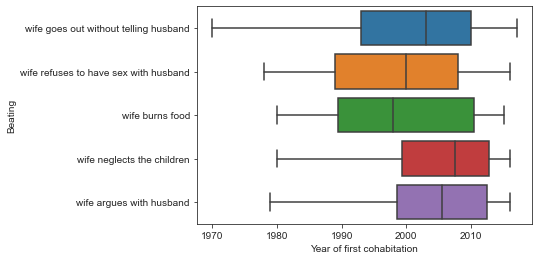

In [713]:
# Numerical variable
# generate boxplot to see the distribution by year of first cohabitation and Beating.
ax = sns.boxplot(x="Year of first cohabitation", y="Beating", data=df_final[df_final.target ==1])

<AxesSubplot:xlabel='Year of first cohabitation', ylabel='Count'>

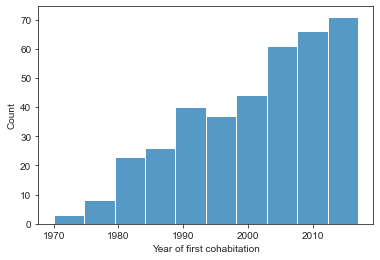

In [714]:
# Generate histoplot to see the distribution by year of first cohabitation .
sns.histplot(x="Year of first cohabitation", data=df_final[df_final.target == 1])

C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


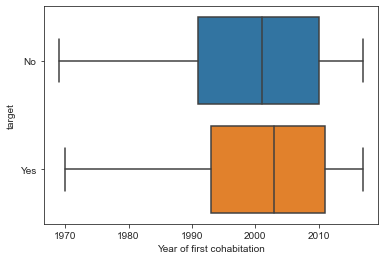

In [530]:
data= df_final[["Year of first cohabitation",'target']]
data['target'].replace({1:'Yes',0:'No'},inplace=True)
ax = sns.boxplot(x="Year of first cohabitation", y="target", data=data)

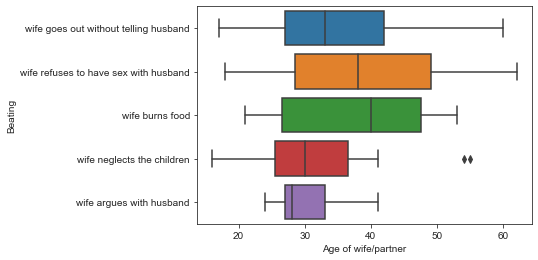

In [531]:
# Numerical variable
# generate a boxplot to see the distributio by Age of wife/partner and Beating.
ax = sns.boxplot(x="Age of wife/partner", y="Beating", data=df_final[df_final.target ==1])

<AxesSubplot:xlabel='Age of wife/partner', ylabel='Count'>

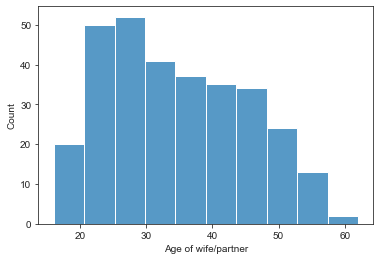

In [532]:


# generate a histoplot to see the the distribution by Age of wife/partnrt and Beating.
sns.histplot(x="Age of wife/partner", data=df_final[df_final.target == 1])

C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


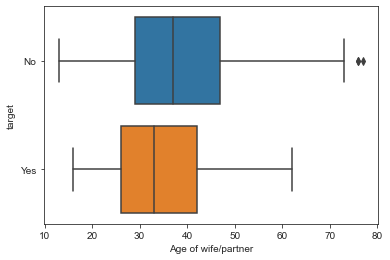

In [533]:
# Let's create a function to replace the Age of wife/partner by yes,no.
data= df_final[["Age of wife/partner",'target']]
data['target'].replace({1:'Yes',0:'No'},inplace=True)
ax = sns.boxplot(x="Age of wife/partner", y="target", data=data)

In [534]:
# Let's create a categorical variable of 7 classes to create classes for each year.
def range_year_first_cohabit(x):
    if x < 1970:
        return ' < 1970'
    elif x>=1970 and x<1980:
        return '1970-1980'
    elif x>=1980 and x<1990:
        return '1980-1990'
    elif  x>=1990 and x<2000:
        return '1990-2000'
    elif x>=2000 and x<2010:
        return '2000-2010'
    elif x>=2010:
        return '>2010'
    else:
        return 'Unkown'


In [535]:
df_final['cohabitation range'] = df_final['Year of first cohabitation'].apply(range_year_first_cohabit)

<ipython-input-535-ea97fb9ecde6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cohabitation range'] = df_final['Year of first cohabitation'].apply(range_year_first_cohabit)


<AxesSubplot:xlabel='Year of first cohabitation', ylabel='1'>

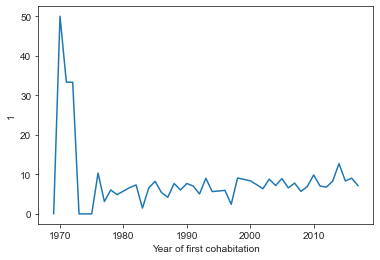

In [715]:

# GEnerate lineplot to see the distribution of year of first cohabitation.
f2=pd.pivot_table(df_final,values="index", index=['Year of first cohabitation'],columns=['target'], aggfunc="count",fill_value =0,margins=True)
f2[0] =np.round(f2[0]/f2['All'],4)*100
f2[1] = np.round(f2[1]/f2['All'],4)*100
f2.drop(index=['All'],columns=['All'],inplace=True)
f2.reset_index(inplace=True)
sns.lineplot(data=f2,x='Year of first cohabitation',y =1)


In [537]:
# Let's create the categorical variables
categorical_cols=df_final.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution', 'Religion',
       'Drinks wine', 'Region', 'Have a job, but currently absent',
       'Sex of household head', 'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Drinks other alcohol',
       'Cohabitation duration (grouped)', 'Years lived in place of residence',
       'Drinks rum', 'Beating justified: wife argues with husband',
       'Drinks beer', 'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and phase',
       'Currently residing with wife/partner',
       'Beating justified: wife refuses to have sex with h

# Hypothesis Test

### The contingency tables between Violence and other Categorical variables

+

Chi-Square test (A Chi-Square test is determined by a significant difference or relationship between two categorical variables from a single population. In general, this test assesses whether distributions of categorical variables differ from each other).

The contingency table between Beating and Region

Chi-Square test

### Null Hypothesis H0: The two categorical variables are independent—that is, Beating is independent with Region.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, Beating is not independent with Region.

In [716]:
# Summarise dataframe using pivot_table: target and Religion.
f3=pd.pivot_table(df_final,values="index", index=['Religion'],columns=['target'], aggfunc="count",fill_value =0)
f3

target,0,1
Religion,,
Catholic,3618,386
No religion,1135,223
Other,11,2
Protestant/Methodist/Adventist/Jehova Witness,3913,287
Vaudousant,178,42


gen yom diferans siyifikatif nan reljyon moun ka bat fanm

In [539]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f3.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 7.906718962439818e-28
Hypothesis Rejected


In [540]:
# let's see the percentage.
f3=pd.pivot_table(df_final,values="index", index=['Religion'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f3[0] =np.round(f3[0]/f3['All'],4)*100
f3[1] = np.round(f3[1]/f3['All'],4)*100
f3.drop(index=['All'],columns=['All'],inplace=True)
f3

target,0,1
Religion,,
Catholic,90.36,9.64
No religion,83.58,16.42
Other,84.62,15.38
Protestant/Methodist/Adventist/Jehova Witness,93.17,6.83
Vaudousant,80.91,19.09


In [541]:
# Insight
f3["Insight"] = np.round(19.09/f3[1])
f3

target,0,1,Insight
Religion,,,
Catholic,90.36,9.64,2.0
No religion,83.58,16.42,1.0
Other,84.62,15.38,1.0
Protestant/Methodist/Adventist/Jehova Witness,93.17,6.83,3.0
Vaudousant,80.91,19.09,1.0


In [542]:
# Let's replace in Region: Aire Metropolitaine by Ouest.
df_final["Region"]= df_final["Region"].apply(lambda x: str(x).replace("Aire Metropolitaine","Ouest"))

<ipython-input-542-24936f8d01e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Region"]= df_final["Region"].apply(lambda x: str(x).replace("Aire Metropolitaine","Ouest"))


yon vodouyiza bat madanm li 3 fois plus ke yon protestan e 2 fois plus ke yon catholic.

In [543]:
# # Summarise dataframe using pivot_table: target and Region.
f4=pd.pivot_table(df_final,values="index", index=['Region'],columns=['target'], aggfunc="count",fill_value =0)
f4

target,0,1
Region,,
Artibonite,979,127
Centre,680,85
Grand'Anse,776,76
Nippes,657,65
Nord,787,112
Nord-Est,642,52
Nord-Ouest,898,74
Ouest,1091,157
Rest-Ouest,806,71


In [544]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f4.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 3.828723597890369e-07
Hypothesis Rejected


In [545]:
# Let's see the percentage.
f4=pd.pivot_table(df_final,values="index", index=['Region'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f4[1] = np.round(f4[1]/f4['All'],4)*100
f4

target,0,1,All
Region,,,
Artibonite,979,11.48,1106
Centre,680,11.11,765
Grand'Anse,776,8.92,852
Nippes,657,9.00,722
Nord,787,12.46,899
Nord-Est,642,7.49,694
Nord-Ouest,898,7.61,972
Ouest,1091,12.58,1248
Rest-Ouest,806,8.10,877


In [546]:
# let's see the insight.
f4=pd.pivot_table(df_final,values="index", index=['Region'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f4[0] =np.round(f4[0]/f4['All'],4)*100
f4[1] = np.round(f4[1]/f4['All'],4)*100
f4.drop(index=['All'],columns=['All'],inplace=True)
f4['insight1_ouest']=np.round(12.58/f4[1])
f4['insight1_nord']=np.round(12.46/f4[1])
f4

target,0,1,insight1_ouest,insight1_nord
Region,,,,
Artibonite,88.52,11.48,1.0,1.0
Centre,88.89,11.11,1.0,1.0
Grand'Anse,91.08,8.92,1.0,1.0
Nippes,91.00,9.00,1.0,1.0
Nord,87.54,12.46,1.0,1.0
Nord-Est,92.51,7.49,2.0,2.0
Nord-Ouest,92.39,7.61,2.0,2.0
Ouest,87.42,12.58,1.0,1.0
Rest-Ouest,91.90,8.10,2.0,2.0


In [547]:
## Summarise dataframe using pivot_table: target and Has an acount in a bank or other finacial institution.
f5=pd.pivot_table(df_final,values="index", index=['Has an account in a bank or other financial institution'],columns=['target'], aggfunc="count",fill_value =0)
f5

target,0,1
Has an account in a bank or other financial institution,,
No,7156,843
Yes,1699,97


In [548]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f5.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 3.2213077743455495e-11
Hypothesis Rejected


In [549]:
# let's calculate the percentage.
f5=pd.pivot_table(df_final,values="index", index=['Has an account in a bank or other financial institution'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f5[1] = np.round(f5[1]/f5['All'],4)*100
f5

target,0,1,All
Has an account in a bank or other financial institution,,,
No,7156,10.54,7999
Yes,1699,5.40,1796
All,8855,9.60,9795


In [550]:
# insight
f5=pd.pivot_table(df_final,values="index", index=['Has an account in a bank or other financial institution'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f5[0] =np.round(f5[0]/f5['All'],4)*100
f5[1] = np.round(f5[1]/f5['All'],4)*100
f5.drop(index=['All'],columns=['All'],inplace=True)
f5['insight5_account_no']=np.round((10.54/f5[1]))
f5

target,0,1,insight5_account_no
Has an account in a bank or other financial institution,,,
No,89.46,10.54,1.0
Yes,94.60,5.40,2.0


In [551]:
#Summarise dataframe using pivot_table: target and Occupation.
f6=pd.pivot_table(df_final,values="index", index=['Occupation'],columns=['target'], aggfunc="count",fill_value =0)
f6

target,0,1
Occupation,,
Agriculteur,3392,349
Artisan,114,6
Cadre de la fonction publique,45,1
Cadres adminsitratifs ou commercial d'entrperise,32,1
Chaffeur,369,37
Chef d'entreprise,24,3
"Clerge, regligieux",42,6
Commercant et assimilï¿½,420,52
"Contremaitre, agent de maitrise",147,21


In [552]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f6.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 3.623949270045971e-07
Hypothesis Rejected


In [553]:
# Let's see the percentage.
f6=pd.pivot_table(df_final,values="index", index=['Occupation'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f6[1] = np.round(f6[1]/f6['All'],4)*100
f6

target,0,1,All
Occupation,,,
Agriculteur,3392,9.33,3741
Artisan,114,5.00,120
Cadre de la fonction publique,45,2.17,46
Cadres adminsitratifs ou commercial d'entrperise,32,3.03,33
Chaffeur,369,9.11,406
Chef d'entreprise,24,11.11,27
"Clerge, regligieux",42,12.50,48
Commercant et assimilï¿½,420,11.02,472
"Contremaitre, agent de maitrise",147,12.50,168


In [554]:
# Insight
f6=pd.pivot_table(df_final,values="index", index=['Occupation'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f6[0] =np.round(f6[0]/f6['All'],4)*100
f6[1] = np.round(f6[1]/f6['All'],4)*100
f6.drop(index=['All'],columns=['All'],inplace=True)
f6['insight_6_1_perso_des_serv']=np.round(16.02/f6[1])
f6['insight^_2_contremaitre']=np.round(12.50/f6[1])
f6

target,0,1,insight_6_1_perso_des_serv,insight^_2_contremaitre
Occupation,,,,
Agriculteur,90.67,9.33,2.0,1.0
Artisan,95.00,5.00,3.0,2.0
Cadre de la fonction publique,97.83,2.17,7.0,6.0
Cadres adminsitratifs ou commercial d'entrperise,96.97,3.03,5.0,4.0
Chaffeur,90.89,9.11,2.0,1.0
Chef d'entreprise,88.89,11.11,1.0,1.0
"Clerge, regligieux",87.50,12.50,1.0,1.0
Commercant et assimilï¿½,88.98,11.02,1.0,1.0
"Contremaitre, agent de maitrise",87.50,12.50,1.0,1.0


In [555]:
# # Summarise dataframe using pivot_table: target and Ever been married or in union.
f7=pd.pivot_table(df_final,values="index", index=['Ever been married or in union'],columns=['target'], aggfunc="count",fill_value =0)
f7

target,0,1
Ever been married or in union,,
Formerly lived with a woman,180,32
Formerly married,356,39
No,4047,561


In [556]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f7.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.16156172189883605
Hypothesis Accepted


In [557]:
# Let's calculate the percentage.
f7=pd.pivot_table(df_final,values="index", index=['Ever been married or in union'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f7[1] = np.round(f7[1]/f7['All'],4)*100
f7

target,0,1,All
Ever been married or in union,,,
Formerly lived with a woman,180,15.09,212
Formerly married,356,9.87,395
No,4047,12.17,4608
All,4583,12.12,5215


In [558]:
# Insight
f7=pd.pivot_table(df_final,values="index", index=['Ever been married or in union'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f7[0] =np.round(f7[0]/f7['All'],4)*100
f7[1] = np.round(f7[1]/f7['All'],4)*100
f7.drop(index=['All'],columns=['All'],inplace=True)
f7['insight7_1_Ever_been_married_or_In_union']=np.round(15.09/f7[1])
f7

target,0,1,insight7_1_Ever_been_married_or_In_union
Ever been married or in union,,,
Formerly lived with a woman,84.91,15.09,1.0
Formerly married,90.13,9.87,2.0
No,87.83,12.17,1.0


In [559]:
# Create the target variable of Beating.
df_final['Drinks_yes_no'] =0
df_final.loc[df_final.Drinks != 'No Drinks','Drinks_yes_no' ]=1
df_final.Drinks.unique()

<ipython-input-559-7ac0cb966996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Drinks_yes_no'] =0
C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['DrinksTafia/Clairin', 'Drinks rum', 'No Drinks', 'Drinks beer',
       'Drinks wine', 'Drinks other alcohol'], dtype=object)

In [560]:
# # Summarise dataframe using pivot_table: target and Drinks_yes_no
f8=pd.pivot_table(df_final,values="index", index=['Drinks_yes_no'],columns=['target'], aggfunc="count",fill_value =0)
f8

target,0,1
Drinks_yes_no,,
0,1941,170
1,6914,770


In [561]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f8.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.007429575711027975
Hypothesis Rejected


In [562]:
# Let's calculate the percentage.
f8=pd.pivot_table(df_final,values="index", index=['Drinks_yes_no'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f8[1] = np.round(f8[1]/f8['All'],4)*100
f8

target,0,1,All
Drinks_yes_no,,,
0,1941,8.05,2111
1,6914,10.02,7684
All,8855,9.60,9795


In [563]:
# Insight
f8=pd.pivot_table(df_final,values="index", index=['Drinks_yes_no'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f8[0] =np.round(f8[0]/f8['All'],4)*100
f8[1] = np.round(f8[1]/f8['All'],4)*100
f8.drop(index=['All'],columns=['All'],inplace=True)
f8['insight8_1_Drinks_yes']=np.round(10.02/f8[1])
f8

target,0,1,insight8_1_Drinks_yes
Drinks_yes_no,,,
0,91.95,8.05,1.0
1,89.98,10.02,1.0


In [564]:
# # Summarise dataframe using pivot_table: target and Sex of household head.
f9=pd.pivot_table(df_final,values="index", index=['Sex of household head'],columns=['target'], aggfunc="count",fill_value =0)
f9

target,0,1
Sex of household head,,
Female,2937,362
Male,5918,578


In [565]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f9.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.0011170869860600984
Hypothesis Rejected


In [566]:
# Let's see the percentage.
f9=pd.pivot_table(df_final,values="index", index=['Sex of household head'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f9[1] = np.round(f9[1]/f9['All'],4)*100
f9

target,0,1,All
Sex of household head,,,
Female,2937,10.97,3299
Male,5918,8.90,6496
All,8855,9.60,9795


In [567]:
# Insight
f9=pd.pivot_table(df_final,values="index", index=['Sex of household head'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f9[0] =np.round(f9[0]/f9['All'],4)*100
f9[1] = np.round(f9[1]/f9['All'],4)*100
f9.drop(index=['All'],columns=['All'],inplace=True)
f9['insight9_1_Sex_of_household']=np.round(10.97/f9[1])
f9

target,0,1,insight9_1_Sex_of_household
Sex of household head,,,
Female,89.03,10.97,1.0
Male,91.10,8.90,1.0


In [568]:
# # Summarise dataframe using pivot_table: target and Have a job, but currently absent.
f10=pd.pivot_table(df_final,values="index", index=['Have a job, but currently absent'],columns=['target'], aggfunc="count",fill_value =0)
f10

target,0,1
"Have a job, but currently absent",,
No,2494,341
Yes,124,9


In [569]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f10.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.08891565435746518
Hypothesis Accepted


In [570]:
# Let's calculate the percentage.
f10=pd.pivot_table(df_final,values="index", index=['Have a job, but currently absent'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f10[1] = np.round(f10[1]/f10['All'],4)*100
f10

target,0,1,All
"Have a job, but currently absent",,,
No,2494,12.03,2835
Yes,124,6.77,133
All,2618,11.79,2968


In [571]:
# Insight
f10=pd.pivot_table(df_final,values="index", index=['Have a job, but currently absent'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f10[0] =np.round(f10[0]/f10['All'],4)*100
f10[1] = np.round(f10[1]/f10['All'],4)*100
f10.drop(index=['All'],columns=['All'],inplace=True)
f10['insight10_have_job']=np.round(12.03/f10[1])
f10

target,0,1,insight10_have_job
"Have a job, but currently absent",,,
No,87.97,12.03,1.0
Yes,93.23,6.77,2.0


In [572]:

#  Summarise dataframe using pivot_table: target and Drinks Tafia/Clairin.
f11=pd.pivot_table(df_final,values="index", index=['Drinks Tafia/Clairin'],columns=['target'], aggfunc="count",fill_value =0)
f11

target,0,1
Drinks Tafia/Clairin,,
No,4745,394
Yes,4110,546


In [573]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f11.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 1.2167840404137857e-11
Hypothesis Rejected


In [574]:
# Calculate the percentage
f11=pd.pivot_table(df_final,values="index", index=['Drinks Tafia/Clairin'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f11[1] = np.round(f11[1]/f11['All'],4)*100
f11

target,0,1,All
Drinks Tafia/Clairin,,,
No,4745,7.67,5139
Yes,4110,11.73,4656
All,8855,9.60,9795


In [575]:
# Insight
f11=pd.pivot_table(df_final,values="index", index=['Drinks Tafia/Clairin'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f11[0] =np.round(f11[0]/f11['All'],4)*100
f11[1] = np.round(f11[1]/f11['All'],4)*100
f11.drop(index=['All'],columns=['All'],inplace=True)
f11['insight11_Drinks/Tafia']=np.round(11.73/f11[1])
f11

target,0,1,insight11_Drinks/Tafia
Drinks Tafia/Clairin,,,
No,92.33,7.67,2.0
Yes,88.27,11.73,1.0


In [576]:
# Summarise dataframe using pivot_table: target and Educational level.
f12=pd.pivot_table(df_final,values="index", index=['Educational level'],columns=['target'], aggfunc="count",fill_value =0)
f12

target,0,1
Educational level,,
Higher,687,20
No education,1473,126
Primary,2769,407
Secondary,3926,387


In [577]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f12.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 8.471658162941032e-18
Hypothesis Rejected


In [578]:
#Let's calculate the percentage
f12=pd.pivot_table(df_final,values="index", index=['Educational level'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f12[1] = np.round(f12[1]/f12['All'],4)*100
f12

target,0,1,All
Educational level,,,
Higher,687,2.83,707
No education,1473,7.88,1599
Primary,2769,12.81,3176
Secondary,3926,8.97,4313
All,8855,9.60,9795


In [579]:
#Insight
f12=pd.pivot_table(df_final,values="index", index=['Educational level'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f12[0] =np.round(f12[0]/f12['All'],4)*100
f12[1] = np.round(f12[1]/f12['All'],4)*100
f12.drop(index=['All'],columns=['All'],inplace=True)
f12['insight12_Educ_primary']=np.round(12.81/f12[1])
f12['insight12_Educ_Secondary']=np.round(8.97/f12[1])
f12

target,0,1,insight12_Educ_primary,insight12_Educ_Secondary
Educational level,,,,
Higher,97.17,2.83,5.0,3.0
No education,92.12,7.88,2.0,1.0
Primary,87.19,12.81,1.0,1.0
Secondary,91.03,8.97,1.0,1.0


In [580]:
df_final.columns

Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation', 'Religion', 'Current age',
       'Age of wife/partner', 'Drinks wine', 'Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Daughters at home',
       'Drinks other alcohol', 'Cohabitation duration (grouped)',
       'Years lived in place of residence', 'Drinks rum',
       'Beating justified: wife argues with husband', 'Drinks beer',
       'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and pha

In [581]:
## Summarise dataframe using pivot_table: target and Current age
f13=pd.pivot_table(df_final,values="index", index=['Current age'],columns=['target'], aggfunc="count",fill_value =0)
f13

target,0,1
Current age,,
15,356,75
16,375,72
17,400,79
18,367,56
19,325,39
20,301,51
21,276,42
22,295,31
23,235,33


In [582]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f13.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 5.353494807290779e-19
Hypothesis Rejected


In [583]:
# Let's calculate the percentage.
f13=pd.pivot_table(df_final,values="index", index=['Current age'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f13[1] = np.round(f13[1]/f13['All'],4)*100
f13

target,0,1,All
Current age,,,
15,356,17.40,431
16,375,16.11,447
17,400,16.49,479
18,367,13.24,423
19,325,10.71,364
20,301,14.49,352
21,276,13.21,318
22,295,9.51,326
23,235,12.31,268


In [584]:
#Insight
f13=pd.pivot_table(df_final,values="index", index=['Current age'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f13[0] =np.round(f13[0]/f13['All'],4)*100
f13[1] = np.round(f13[1]/f13['All'],4)*100
f13.drop(index=['All'],columns=['All'],inplace=True)
f13['insight13_1_Current_age_15']=np.round(17.40/f13[1])
f13['insight13_1_Current_age_17']=np.round(16.49/f13[1])
f13

target,0,1,insight13_1_Current_age_15,insight13_1_Current_age_17
Current age,,,,
15,82.60,17.40,1.0,1.0
16,83.89,16.11,1.0,1.0
17,83.51,16.49,1.0,1.0
18,86.76,13.24,1.0,1.0
19,89.29,10.71,2.0,2.0
20,85.51,14.49,1.0,1.0
21,86.79,13.21,1.0,1.0
22,90.49,9.51,2.0,2.0
23,87.69,12.31,1.0,1.0


In [585]:
#Summarise dataframe using pivot_table: target and Currently working.
f14=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['target'], aggfunc="count",fill_value =0)
f14

target,0,1
Currently working,,
No,2494,341
Yes,6361,599


In [586]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f14.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 2.2617021815243559e-07
Hypothesis Rejected


In [587]:
#Let's calculate the percentage.
f14=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f14[1] = np.round(f14[1]/f14['All'],4)*100
f14

target,0,1,All
Currently working,,,
No,2494,12.03,2835
Yes,6361,8.61,6960
All,8855,9.60,9795


In [588]:
#Let's see the insight.#

f14=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f14[0] =np.round(f14[0]/f14['All'],4)*100
f14[1] = np.round(f14[1]/f14['All'],4)*100
f14.drop(index=['All'],columns=['All'],inplace=True)
f14['insight14_Currently_working']=np.round(12.03/f14[1])
f14

target,0,1,insight14_Currently_working
Currently working,,,
No,87.97,12.03,1.0
Yes,91.39,8.61,1.0


In [717]:
# Summarise dataframe using pivot_table: target and Employment all year/seasonal.
f15=pd.pivot_table(df_final,values="index", index=['Employment all year/seasonal'],columns=['target'], aggfunc="count",fill_value =0)
f15

target,0,1
Employment all year/seasonal,,
All year,4281,380
Occasional,931,123
Seasonal,1762,179


In [590]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f15.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.00121869878412666
Hypothesis Rejected


In [591]:
#Let's calculate the percentage.
f15=pd.pivot_table(df_final,values="index", index=['Employment all year/seasonal'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f15[1] = np.round(f15[1]/f15['All'],4)*100
f15

target,0,1,All
Employment all year/seasonal,,,
All year,4281,8.15,4661
Occasional,931,11.67,1054
Seasonal,1762,9.22,1941
All,6974,8.91,7656


In [592]:
#Insight
f15=pd.pivot_table(df_final,values="index", index=['Employment all year/seasonal'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f15[0] =np.round(f15[0]/f15['All'],4)*100
f15[1] = np.round(f15[1]/f15['All'],4)*100
f15.drop(index=['All'],columns=['All'],inplace=True)
f15['insight15_Employment_Occasional']=np.round(11.67/f15[1])
f15

target,0,1,insight15_Employment_Occasional
Employment all year/seasonal,,,
All year,91.85,8.15,1.0
Occasional,88.33,11.67,1.0
Seasonal,90.78,9.22,1.0


In [593]:
# Summarise dataframe using pivot_table: target and Years lived in place of residence.
f16=pd.pivot_table(df_final,values="index", index=['Years lived in place of residence'],columns=['target'], aggfunc="count",fill_value =0)
f16

target,0,1
Years lived in place of residence,,
0,273,32
1,180,35
2,240,20
3,229,25
4,198,24
...,...,...
62,1,0
63,1,0
64,2,0


In [594]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f16.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.06202877002648047
Hypothesis Accepted


In [595]:
#Let's calculate the percentage.
f16=pd.pivot_table(df_final,values="index", index=['Years lived in place of residence'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f16[1] = np.round(f16[1]/f16['All'],4)*100
f16

target,0,1,All
Years lived in place of residence,,,
0,273,10.49,305
1,180,16.28,215
2,240,7.69,260
3,229,9.84,254
4,198,10.81,222
...,...,...,...
63,1,0.00,1
64,2,0.00,2
Always,5526,10.28,6159


In [596]:
#Insight
f16=pd.pivot_table(df_final,values="index", index=['Years lived in place of residence'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f16[0] =np.round(f16[0]/f16['All'],4)*100
f16[1] = np.round(f16[1]/f16['All'],4)*100
f16.drop(index=['All'],columns=['All'],inplace=True)
f16['insight16__Years_lived-4']=np.round(10.81/f16[1])
f16['insight16__Years_lived-1']=np.round(16.28/f16[1])
f16['insight16__Years_lived-4']=np.round(10.81/f16[1])
f16

target,0,1,insight16__Years_lived-4,insight16__Years_lived-1
Years lived in place of residence,,,,
0,89.51,10.49,1.0,2.0
1,83.72,16.28,1.0,1.0
2,92.31,7.69,1.0,2.0
3,90.16,9.84,1.0,2.0
4,89.19,10.81,1.0,2.0
...,...,...,...,...
62,100.00,0.00,inf,inf
63,100.00,0.00,inf,inf
64,100.00,0.00,inf,inf


lwes, atibonit,sant e nip bat mooun 2 fois plus ke res depatman yo.

In [597]:
#Summarise dataframe using pivot_table: target and On average respondent smokes daily: manufactured cigarettes.
f18=pd.pivot_table(df_final,values="index", index=['On average respondent smokes daily: manufactured cigarettes'],columns=['target'], aggfunc="count",fill_value =0)
f18

target,0,1
On average respondent smokes daily: manufactured cigarettes,,
1,13,6
2,38,7
3,48,10
4,52,7
5,72,13
6,38,4
7,13,4
8,16,2
9,2,1


In [598]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f18.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.0002641215021093484
Hypothesis Rejected


In [599]:
#Let's calculate the percentage.
f18=pd.pivot_table(df_final,values="index", index=['On average respondent smokes daily: manufactured cigarettes'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f18[1] = np.round(f18[1]/f18['All'],4)*100
f18

target,0,1,All
On average respondent smokes daily: manufactured cigarettes,,,
1,13,31.58,19
2,38,15.56,45
3,48,17.24,58
4,52,11.86,59
5,72,15.29,85
6,38,9.52,42
7,13,23.53,17
8,16,11.11,18
9,2,33.33,3


In [600]:
#Insight
f18=pd.pivot_table(df_final,values="index", index=['On average respondent smokes daily: manufactured cigarettes'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f18[0] =np.round(f18[0]/f18['All'],4)*100
f18[1] = np.round(f18[1]/f18['All'],4)*100
f18.drop(index=['All'],columns=['All'],inplace=True)
f18['insight_18_manufactured_cigaretes_60']=np.round(100.00/f18[1])
f18['insight_18_manufactured_cigarettes_21']=np.round(50.00/f18[1])
f18

target,0,1,insight_18_manufactured_cigaretes_60,insight_18_manufactured_cigarettes_21
On average respondent smokes daily: manufactured cigarettes,,,,
1,68.42,31.58,3.0,2.0
2,84.44,15.56,6.0,3.0
3,82.76,17.24,6.0,3.0
4,88.14,11.86,8.0,4.0
5,84.71,15.29,7.0,3.0
6,90.48,9.52,11.0,5.0
7,76.47,23.53,4.0,2.0
8,88.89,11.11,9.0,5.0
9,66.67,33.33,3.0,2.0


In [601]:
#Summarise dataframe using pivot_table: target and Daughter's at home.
f19=pd.pivot_table(df_final,values="index", index=['Daughters at home'],columns=['target'], aggfunc="count",fill_value =0)
f19

target,0,1
Daughters at home,,
0,6351,768
1,1365,102
2,705,42
3,285,19
4,106,5
5,32,3
6,9,1
8,2,0


In [602]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f19.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 1.6628004723929614e-07
Hypothesis Rejected


In [603]:
#Let's calculate the percentage.
f19=pd.pivot_table(df_final,values="index", index=['Daughters at home'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f19[1] = np.round(f19[1]/f19['All'],4)*100
f19

target,0,1,All
Daughters at home,,,
0,6351,10.79,7119
1,1365,6.95,1467
2,705,5.62,747
3,285,6.25,304
4,106,4.50,111
5,32,8.57,35
6,9,10.00,10
8,2,0.00,2
All,8855,9.60,9795


In [604]:
#Insight
f19=pd.pivot_table(df_final,values="index", index=['Daughters at home'],columns=['target'], aggfunc="count",fill_value =0, margins=1)
f19[0] =np.round(f19[0]/f19['All'],4)*100
f19[1] = np.round(f19[1]/f19['All'],4)*100
f19.drop(index=['All'],columns=['All'],inplace=True)
f19['insight_Dughters_at_home']=np.round(10.79/f19[1])
f19['insight_Daughters_at_home']=np.round(10.00/f19[1])
f19

target,0,1,insight_Dughters_at_home,insight_Daughters_at_home
Daughters at home,,,,
0,89.21,10.79,1.0,1.0
1,93.05,6.95,2.0,1.0
2,94.38,5.62,2.0,2.0
3,93.75,6.25,2.0,2.0
4,95.50,4.50,2.0,2.0
5,91.43,8.57,1.0,1.0
6,90.00,10.00,1.0,1.0
8,100.00,0.00,inf,inf


In [605]:
#Let's create a target variable of wife goes out without telling husband.
df_final["wife_goes_out_yes_no"] = 0
df_final.loc[df_final['Beating justified: wife goes out without telling husband'] == 'Yes',"wife_goes_out_yes_no"]= 1
df_final['wife_goes_out_yes_no'].value_counts(normalize=True)


<ipython-input-605-270bc2ba7882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["wife_goes_out_yes_no"] = 0
C:\Users\peladia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0    0.937519
1    0.062481
Name: wife_goes_out_yes_no, dtype: float64

In [606]:
#Summarise dataframe using pivot_table: wife goes out and Occupation
ff=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['wife_goes_out_yes_no'], aggfunc="count",fill_value =0)
ff

wife_goes_out_yes_no,0,1
Currently working,,
No,2629,206
Yes,6554,406


In [607]:
# Apply Test
stat, p, dof, expected = chi2_contingency(ff.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
 

p-values: 0.009018191017288221
Hypothesis Rejected


In [608]:
#Let's calculate the percentage.
ff=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['wife_goes_out_yes_no'], aggfunc="count",fill_value =0, margins=1)
ff[1] = np.round(ff[1]/ff['All'],4)*100
ff


wife_goes_out_yes_no,0,1,All
Currently working,,,
No,2629,7.27,2835
Yes,6554,5.83,6960
All,9183,6.25,9795


In [609]:
#Insight
ff=pd.pivot_table(df_final,values="index", index=['Currently working'],columns=['wife_goes_out_yes_no'], aggfunc="count",fill_value =0, margins=1)
ff[0] =np.round(ff[0]/ff['All'],4)*100
ff[1] = np.round(ff[1]/ff['All'],4)*100
ff.drop(index=['All'],columns=['All'],inplace=True)
ff['insight_ff_wife_goes_out']=np.round(7.27/ff[1])
ff

wife_goes_out_yes_no,0,1,insight_ff_wife_goes_out
Currently working,,,
No,92.73,7.27,1.0
Yes,94.17,5.83,1.0


### Description statistique des femmes battues.

Analysis:
For the first tree groups we observe in the dataset we can see:



## Final Visualization and Exploratory

fi ki pap travail yo ki pa di kote yo prale plus pran baton ke fi fi ki ap travail, ki di mari yo ki kote yo ale. 

In [611]:
def graphcateg(data = df_final, col1 = "", col2 = "", test = ""):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  tab = pd.crosstab(data[col1], data[col2])
  sns.countplot(data=df_final, y=col1 ,ax=ax1, palette = "Set2")
  """sns.barplot(x = col1, hue= col2, y = col2, data = df_final, ax = ax2)"""
  tab.plot(kind="bar", ax=ax2)
 

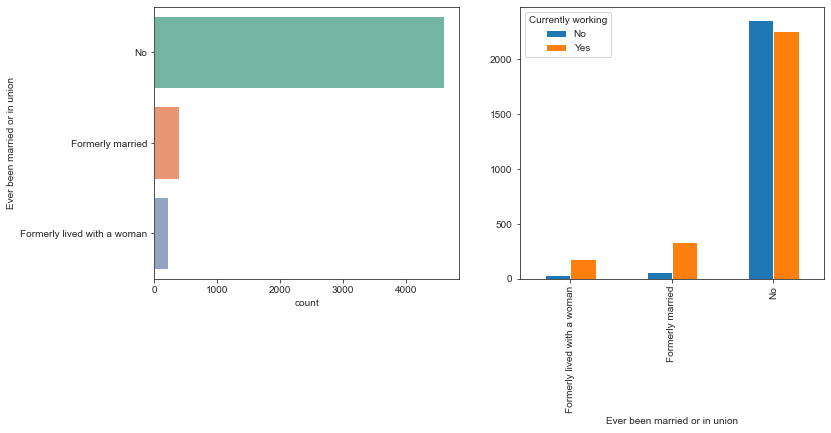

In [612]:
graphcateg(col1 = "Ever been married or in union", col2='Currently working')

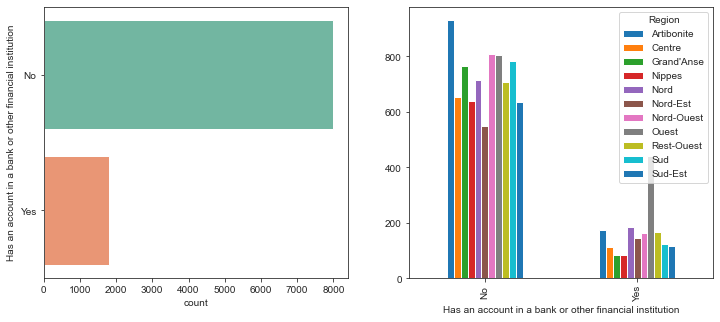

In [613]:
graphcateg(col1 = "Has an account in a bank or other financial institution", col2='Region')

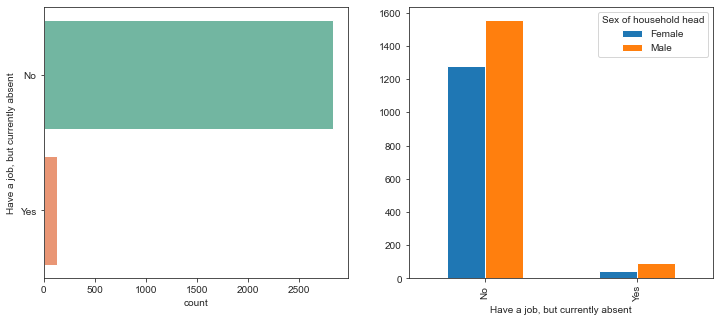

In [614]:
graphcateg(col1 = "Have a job, but currently absent",col2 = "Sex of household head")

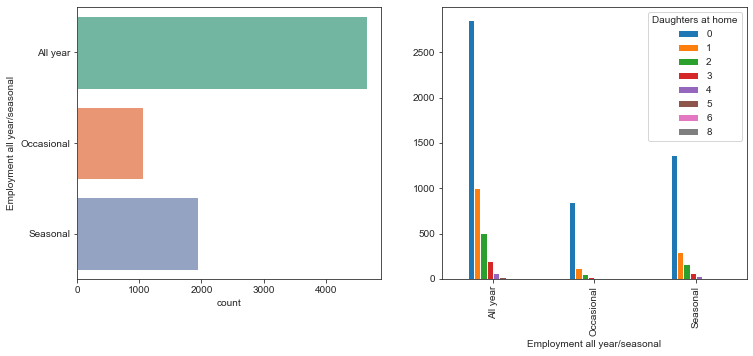

In [615]:
graphcateg(col1 = "Employment all year/seasonal",col2 = "Daughters at home")

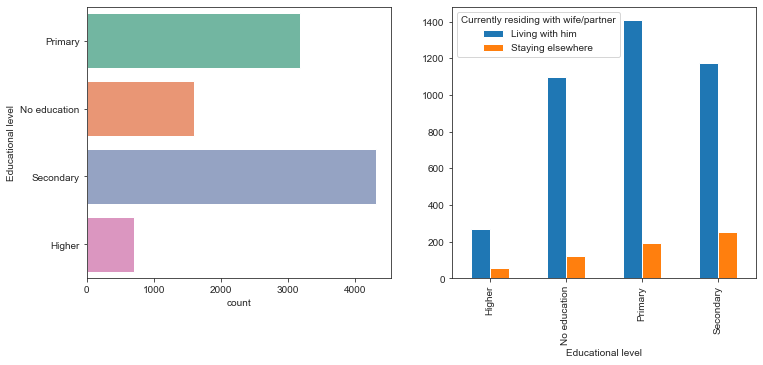

In [616]:
graphcateg(col1 = "Educational level",col2 = "Currently residing with wife/partner")

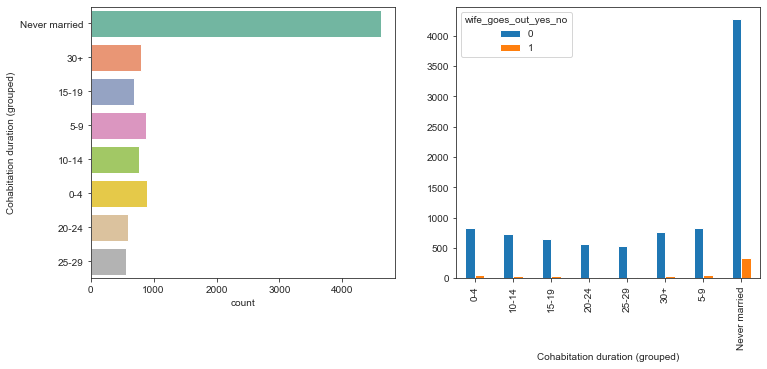

In [617]:
graphcateg(col1 = "Cohabitation duration (grouped)",col2 = "wife_goes_out_yes_no")

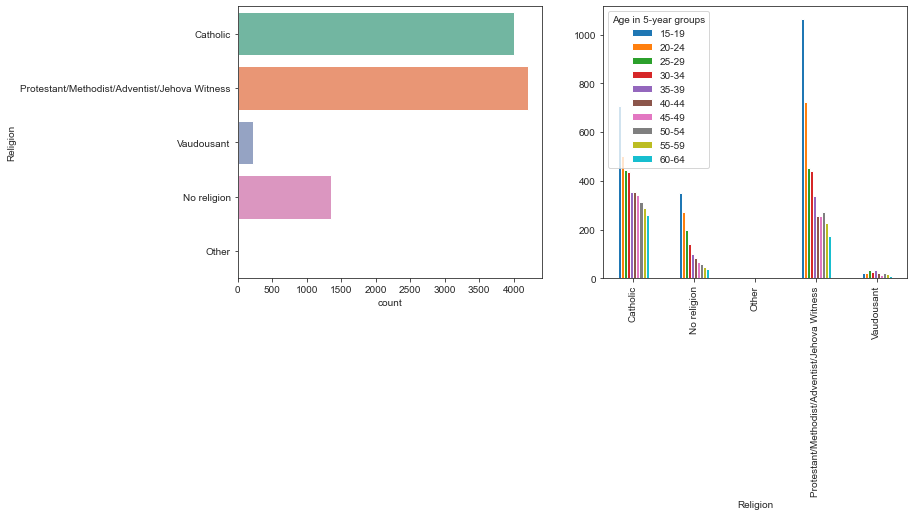

In [618]:
graphcateg(col1 = "Religion",col2 = "Age in 5-year groups")

In [620]:
#graphcateg(col1 = "Drinks_yes_no",col2 = "Age")

In [621]:
df_final.columns

Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation', 'Religion', 'Current age',
       'Age of wife/partner', 'Drinks wine', 'Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Daughters at home',
       'Drinks other alcohol', 'Cohabitation duration (grouped)',
       'Years lived in place of residence', 'Drinks rum',
       'Beating justified: wife argues with husband', 'Drinks beer',
       'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and pha

In [622]:
df_final.Occupation

0                                         Agriculteur
1                                         Agriculteur
2                                         Agriculteur
3                                         Agriculteur
4       Not working and didn't work in last 12 months
                            ...                      
9790             Ouvrier qualifiï¿½ de type artisanal
9791                                         Chaffeur
9792    Personnel des services directs au particulier
9793                                          Artisan
9794                         Commercant et assimilï¿½
Name: Occupation, Length: 9795, dtype: object

In [299]:
df_final.columns

Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation', 'Religion', 'Current age',
       'Age of wife/partner', 'Drinks wine', 'Region',
       'Have a job, but currently absent', 'Sex of household head',
       'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Daughters at home',
       'Drinks other alcohol', 'Cohabitation duration (grouped)',
       'Years lived in place of residence', 'Drinks rum',
       'Beating justified: wife argues with husband', 'Drinks beer',
       'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and pha

In [627]:
df_final.head()

,Occupation,Ever been married or in union,Has an account in a bank or other financial institution,Year of first cohabitation,Religion,Current age,Age of wife/partner,Drinks wine,Region,"Have a job, but currently absent",...,Age of household head,Currently working,Beating justified: wife neglects the children,Drinks,index,Beating,target,cohabitation range,Drinks_yes_no,wife_goes_out_yes_no
0,Agriculteur,No,No,NaN,Catholic,28,NaN,No,Sud,NaN,...,69,Yes,No,DrinksTafia/Clairin,0,No Beating,0,Unkown,1,0
1,Agriculteur,Formerly married,No,1978.0,Catholic,56,NaN,No,Sud,NaN,...,69,Yes,No,Drinks rum,1,No Beating,0,1970-1980,1,0
2,Agriculteur,Formerly married,No,1999.0,Protestant/Methodist/Adventist/Jehova Witness,48,NaN,No,Sud,NaN,...,48,Yes,No,DrinksTafia/Clairin,2,No Beating,0,1990-2000,1,0
3,Agriculteur,Formerly married,No,2007.0,Protestant/Methodist/Adventist/Jehova Witness,50,NaN,No,Sud,NaN,...,48,Yes,No,DrinksTafia/Clairin,3,No Beating,0,2000-2010,1,0
4,Not working and didn't work in last 12 months,No,No,NaN,Catholic,32,NaN,No,Sud,No,...,48,No,No,DrinksTafia/Clairin,4,No Beating,0,Unkown,1,0


Les femmes sont victimes de violences en fonction de leur âge, de leur niveau d'éducation, de leur profession et du fait qu'elles soient soumises ou non.
Les femmes qui sont victimes de violence sont celles qui ne travaillent pas, qui ont un faible niveau d'éducation et qui ont des enfants.
Partons du principe que les facteurs de risque liés à la violence domestique sont les suivants 
- le jeune âge
- consommation/abus d'alcool et de drogues
- être séparé ou divorcé ou en union
- la grossesse
- faible niveau d'éducation
- niveau socio-démographique
 Un modèle qui pourrait déterminer la forme de violence la plus courante chez les femmes âgées de 15 à 25 ans (adultes) par région.


 ## Final Visualization and Exploratory

In [628]:
#create function able to plot and calculate descriptive analysis for categorical columns 
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), 
          end='\n\n\n')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.xticks(rotation = 45)
        plt.show()


let's see the analysis for each categorical columns.

In [629]:
cols=["Age in 5-year groups","Region","Educational level","target"]

       Age in 5-year groups      Ratio
15-19                  2144  21.888719
20-24                  1524  15.558959
25-29                  1132  11.556917
30-34                  1047  10.689127
35-39                   828   8.453292
40-44                   717   7.320061
45-49                   681   6.952527
50-54                   670   6.840225
55-59                   576   5.880551
60-64                   476   4.859622




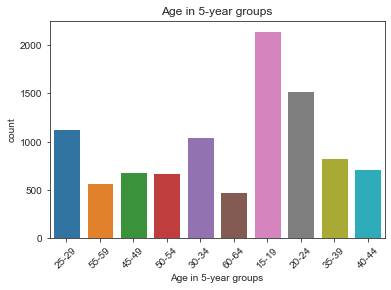

            Region      Ratio
Ouest         1248  12.741194
Artibonite    1106  11.291475
Nord-Ouest     972   9.923430
Sud            909   9.280245
Nord           899   9.178152
Rest-Ouest     877   8.953548
Grand'Anse     852   8.698315
Centre         765   7.810107
Sud-Est        751   7.667177
Nippes         722   7.371108
Nord-Est       694   7.085248




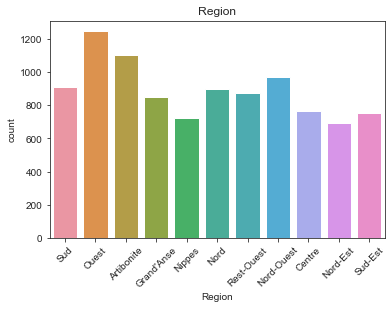

              Educational level      Ratio
Secondary                  4313  44.032670
Primary                    3176  32.424706
No education               1599  16.324655
Higher                      707   7.217968




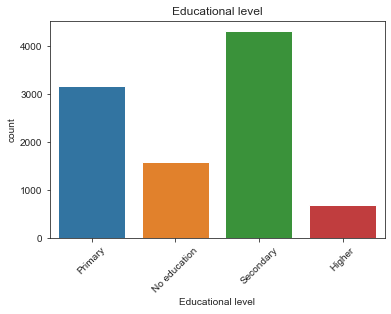

   target      Ratio
0    8855  90.403267
1     940   9.596733




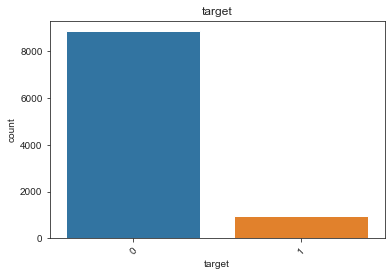

In [630]:
for col in cols:
    cat_summary(df_final, col, plot=True)

### Description statistique des femmes battues.

Analysis:
For the first tree groups we observe in the dataset we can see:

22% ,16% et 12% des femmes qui sont battues sont successivement de groupe d'age:15-19, 20-24, 25-29 ans.
16% des

12%, 11%s  et 9% d'entre eux sont de la region: Aire Metropolitaine, Artibonite et Nord-Ouest.
 
44% d'entre eux sont de niveau d'education primaire.
32% sont de niveau primaire.
16% sont de niveau d'education 0.
et 7% sont de  niveau Higher

Parmi toutes ces femmes 10% sont victimes de violence.

In [631]:
#df_final.info()

In [632]:
# Let's split numerical and categorical variables
#numerical_cols=df_final.select_dtypes(include=['float64',"int32"]).columns
#numerical_cols

In [633]:
# Let's create tthe categorical variables
#categorical_cols=df_final.select_dtypes(include=["object"]).columns
#categorical_cols

In [634]:
#df_final["Age of wife/partner"].unique()

In [635]:
### Univariate analysis
#sns.distplot(df_final["Age of wife/partner"]) # numeric
#sns.boxplot(df_final["Age of wife/partner"]) # numeric

In [636]:
#sns.histplot(df_final["Age of wife/partner"])

In [637]:
### Univariate analysis
#sns.distplot(df_final["Current age"]) # categorical

In [638]:
#df_final.columns

In [639]:
g=df_final.groupby("Age in 5-year groups")

In [640]:
print(g.get_group('20-24').shape)

(1524, 44)


In [641]:
#!pip install plotly
#import plotly.express as px

In [642]:
#show different rate Age in 5-year groups girl by department
#fem = df_final.loc[:,['Region','Age in 5-year groups']]
#fem = fem.groupby('Region')['Age in 5-year groups'].sum().reset_index()
#fem = fem.sort_values('Age in 5-year groups')
#fig= px.pie(fem, names='Region', values='Age in 5-year groups', template='seaborn')
#fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
#fig.show()

In [643]:
#fem.head()

In [644]:
# Regardons l'age moyen pour chaque groupe de femme battue
def minimum(y):
    pr=(df_final[df_final[y]=="Yes"].Age.mean())
    return pr

In [645]:
df_final=df_final.rename({"Current age" : "Age"}, axis=1)

In [646]:
minimum("Beating justified: wife refuses to have sex with husband")

30.291338582677167

In [647]:
minimum("Beating justified: wife goes out without telling husband")

29.313725490196077

In [648]:
minimum("Beating justified: wife neglects the children")

26.512396694214875

In [649]:
minimum("Beating justified: wife argues with husband")

27.022727272727273

In [650]:
minimum("Beating justified: wife burns food")

28.166666666666668

In [651]:
#df_final.Beating

In [652]:
#df_final["Beating"].unique()

In [653]:
# create index
#df_final["index"]=df_final.index

In [654]:
#df_final["Region"]= df_final["Region"].apply(lambda x: str(x).replace("Aire Metropolitaine","Ouest"))

In [655]:
#df_final["Region"]= df_final["Region"].apply(lambda x: str(x).replace("Rest-Ouest","Ouest"))

In [656]:
# Addition of 
#157/(157+1091)

p-value: 2.41 Hypothesis Rejected cest-a-dire la violence faite sur les femmes ne depend pas vraiment de  leur region leur mari peut leur battre n'importe ou elles viennent.

In [657]:
# information
#kf1.info()

p.value: 8.47
Hypotheses Rejected c'est a dire peu importe leur niveau d'education  qu'il soit: primary, secondary, no education ou higher les femmmes peuvent etre victimes de violence.

p-value:2.26
Hypoyhesis Rejected cela signifie qu'elles peuvent etre victimes de violence peu importe leur groupe d'age.

p-value: 3.62
Hypothesis Rejected cela signifie que les femmes n'ont pas besoin d'avoir une occupation pour etre victime de violence.

p-value 3.22
Hypothesis Rejected c'est-a-dire les femmes qui sont victimes de violence n'ont pas de compte dans une Banque ou d'une autre institution financiere.

### Questions

### 1-Dans quelle mesure lee taux de violence affecte t-il les femmes?
### 2-Expliquez le taux de violence par les caregories ci-dessous?
### a. Les donnees comme: Age, Region,Niveau d'education et Occupation.
### 3-Quels categorie de femmes qui sont generalement victimes de violence(Beating)? 
### 4-Combien de temps faudra t-il aux institutions associatives pour eradiquer ou attenuer ces formes de violences?
### 5- Quels sont les groupes démographiques qui seront eradiquer ou atténuer en premier?  


In [684]:
# calculate the number of femme battue and the percentage
df_final['target'].value_counts()


0    8855
1     940
Name: target, dtype: int64

In [659]:

#kf = df_final["Beating"].astype('category')
#liste_cat_dum = pd.get_dummies(kf)

In [660]:
#liste_cat_dum["wife goes out without telling husband"].describe()

In [661]:
print(df_final.shape)
print(df_final.columns)

(9795, 44)
Index(['Occupation', 'Ever been married or in union',
       'Has an account in a bank or other financial institution',
       'Year of first cohabitation', 'Religion', 'Age', 'Age of wife/partner',
       'Drinks wine', 'Region', 'Have a job, but currently absent',
       'Sex of household head', 'Beating justified: wife burns food',
       'Beating justified: wife goes out without telling husband',
       'Age in 5-year groups', 'Occupation (grouped)',
       'On average respondent uses daily: snuff by nose',
       'Employment all year/seasonal', 'Daughters at home',
       'Drinks other alcohol', 'Cohabitation duration (grouped)',
       'Years lived in place of residence', 'Drinks rum',
       'Beating justified: wife argues with husband', 'Drinks beer',
       'Educational level',
       'On average respondent smokes daily: manufactured cigarettes',
       'In the past smoked tobacco every day', 'Drinks Tafia/Clairin',
       'Drinks alcohol', 'Country code and phase',

In [662]:
#f=df_final.groupby("Region")

In [663]:
#print(f.get_group('Artibonite').shape)

In [664]:
#d.crosstab(df_final["Region"], df_final["Beating"])


In [665]:
#transform the type of the list to category
#liste_cat1 = df[liste_cat].astype('category')
#Transform dataframe by dummies
#liste_cat_dum = pd.get_dummies(liste_cat1)

In [666]:
#create function able to plot and calculate descriptive analysis for categorical columns 
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), 
          end='\n\n\n')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.xticks(rotation = 45)
        plt.show()

In [667]:
cat_cols=["Beating justified: wife argues with husband","Occupation (grouped)","Beating justified: wife burns food","Beating justified: wife neglects the children","Beating justified: wife refuses to have sex with husband"]

            Beating justified: wife argues with husband      Ratio
No                                                 9662  98.642164
Yes                                                 132   1.347626
Don't know                                            1   0.010209




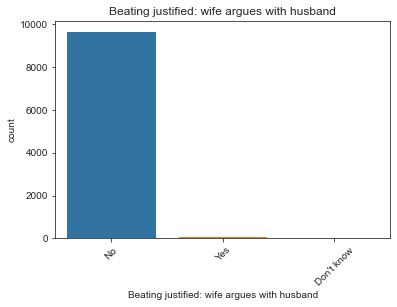

                                   Occupation (grouped)      Ratio
Agriculture - self employed                        3745  38.233793
Not working                                        2139  21.837672
Skilled manual                                     1442  14.721797
Professional/technical/managerial                  1113  11.362940
Sales                                               998  10.188872
Household and domestic                              206   2.103114
Unskilled manual                                    143   1.459929
Other                                                 9   0.091884




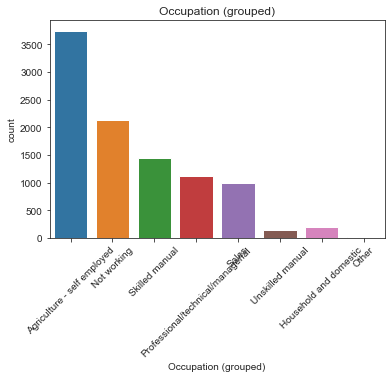

            Beating justified: wife burns food      Ratio
No                                        9625  98.264421
Yes                                        168   1.715161
Don't know                                   2   0.020419




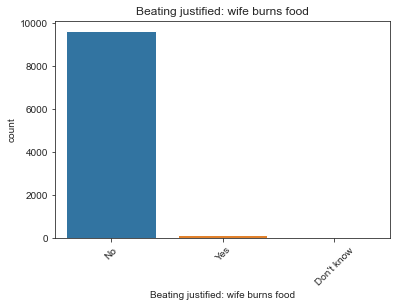

     Beating justified: wife neglects the children      Ratio
No                                            9311  95.058703
Yes                                            484   4.941297




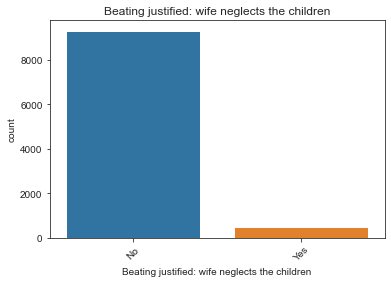

            Beating justified: wife refuses to have sex with husband  \
No                                                       9540          
Yes                                                       254          
Don't know                                                  1          

                Ratio  
No          97.396631  
Yes          2.593160  
Don't know   0.010209  




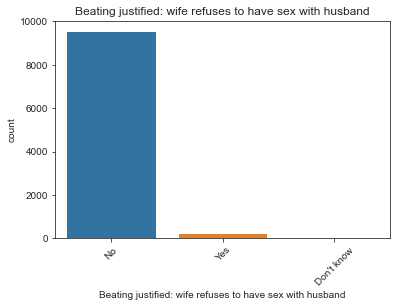

In [668]:
for col in cat_cols:
    cat_summary(df_final, col, plot=True)

### Analysis

In [669]:
print(df_final.isnull().sum(axis=1))

0       6
1       5
2       5
3       5
4       6
       ..
9790    4
9791    6
9792    3
9793    6
9794    6
Length: 9795, dtype: int64


In [670]:
#df_final.shape
#15513,33

# Modele

In [671]:
df_final.drop(['Has an account in a bank or other financial institution','Beating justified: wife refuses to have sex with husband','Beating justified: wife neglects the children','Beating justified: wife goes out without telling husband','Beating justified: wife burns food','Beating justified: wife argues with husband','Wife justified refusing sex: husband has other women','Country code and phase','On average respondent smokes daily: manufactured cigarettes','In the past smoked tobacco every day','On average respondent uses daily: snuff by nose','Occupation (grouped)','Employment all year/seasonal','cohabitation range','Sex of household head','Cohabitation duration (grouped)','Year of first cohabitation','Age of wife/partner','Drinks wine','Age in 5-year groups','Daughters at home','Have a job, but currently absent','Drinks other alcohol','Years lived in place of residence','Drinks rum','Drinks beer','Drinks Tafia/Clairin','Drinks alcohol','Currently residing with wife/partner','Since how many years smokes respondent','Age of household head','Beating','Drinks_yes_no','Currently working','wife_goes_out_yes_no','Drinks'],axis=1,inplace=True)

In [672]:
df_final=pd.get_dummies(df_final,columns=['Educational level','Region','Religion','Ever been married or in union','Occupation'])
df_final

,Age,index,target,Educational level_Higher,Educational level_No education,Educational level_Primary,Educational level_Secondary,Region_Artibonite,Region_Centre,Region_Grand'Anse,...,Occupation_Ouvrier qualifiï¿½ de type industriel,Occupation_Personnel des services directs au particulier,Occupation_Policier ou militaire,"Occupation_Professeur, Profession Scientifque",Occupation_Profession de l'information des arts et spectacles,Occupation_Profession intermediare de la sante et du travail social,Occupation_Profession intermediare/administrative du privï¿½,Occupation_Profession intermediare/administrative du public,Occupation_Profession libï¿½rale,Occupation_Technicien (sauf technicien du tertiaire)
0,28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,48,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,62,9790,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9791,31,9791,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9792,61,9792,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9793,30,9793,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [673]:
Y = df_final['target']

In [674]:
X=df_final.drop(labels=["target"],axis=1)


In [675]:
from sklearn.model_selection import train_test_split

In [676]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=20)
print(X_train)

      Age  index  Educational level_Higher  Educational level_No education  \
3850   16   3850                         0                               0   
7946   19   7946                         0                               0   
241    27    241                         0                               0   
4259   25   4259                         1                               0   
8434   55   8434                         0                               1   
...   ...    ...                       ...                             ...   
3915   61   3915                         0                               1   
9620   18   9620                         0                               0   
7068   34   7068                         1                               0   
7391   32   7391                         0                               0   
4367   61   4367                         0                               1   

      Educational level_Primary  Educational level_Secondary  \

In [677]:
from sklearn.ensemble import RandomForestClassifier

In [678]:
model=RandomForestClassifier(n_estimators=10,random_state=30)

In [679]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [680]:
prediction_test=model.predict(X_test)
print(prediction_test)

[0 0 0 ... 0 0 0]


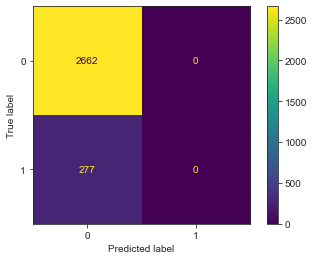

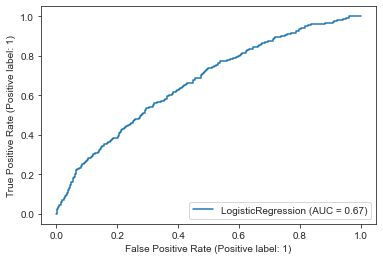

In [681]:
# features_selected = ['Educational level','Region','Religion','Ever been married or in union','Occupation','Age']
# X = df_final[features_selected]
# Y = df_final['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state=49)
lr  = LogisticRegression()
lr.fit(X_train,Y_train)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,Y_test)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,Y_test)

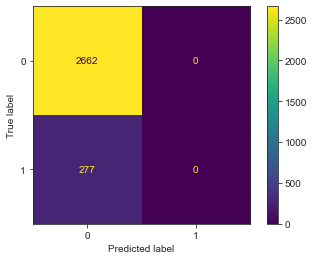

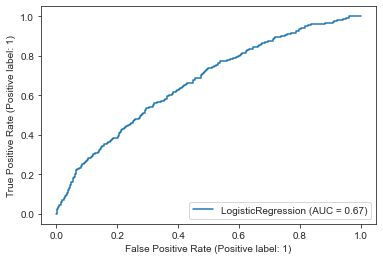

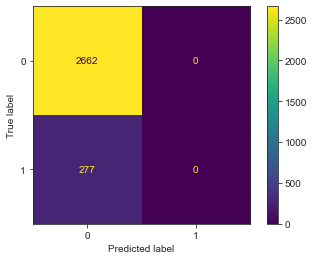

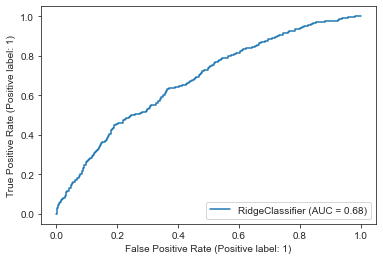

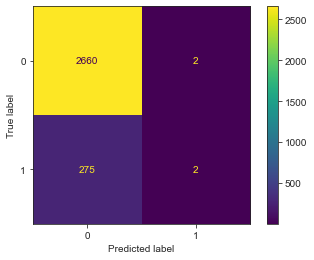

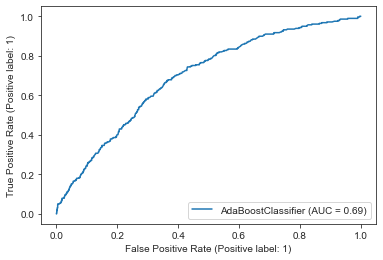

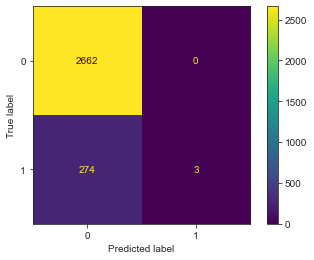

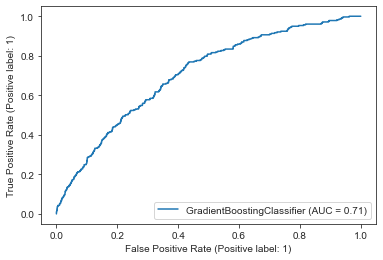

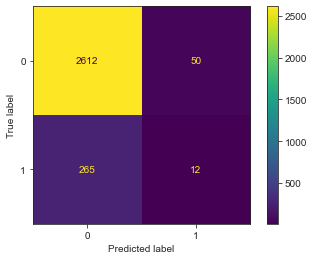

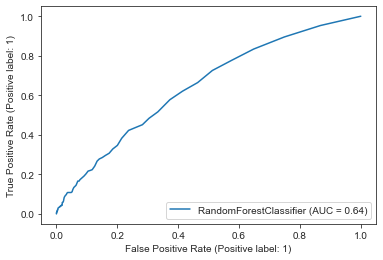

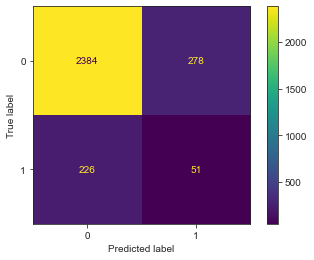

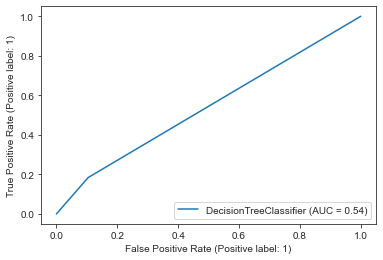

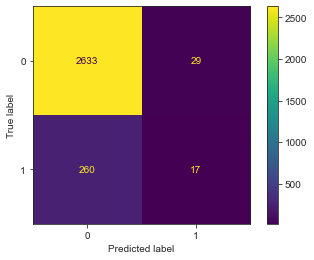

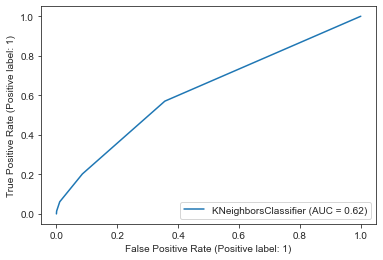

In [682]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,Y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,Y_test))
  plot_confusion_matrix(model,X_test,Y_test)
  plot_roc_curve(model,X_test,Y_test)
   #msles.append(mean_squared_log_error(y_test,y_pred))
df = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [683]:
df

,names,scores,times
0,LogisticRegression,0.905750,2.033704
1,RidgeClassifier,0.905750,0.798999
2,AdaBoostClassifier,0.905750,2.042325
3,GradientBoostingClassifier,0.906771,5.480740
4,RandomForestClassifier,0.892821,3.404464
5,DecisionTreeClassifier,0.828513,0.176106
6,KNeighborsClassifier,0.901667,0.004164
